# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [7]:
df = pd.read_csv('../downloads/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [8]:
df.columns
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [9]:
df["ENROLL_ALL"].isna().sum()

np.int64(83)

In [10]:
(df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDER"]-df["ENROLL_PRIMARY"]-df["ENROLL_HS"]).describe()

count      1012.000000
mean       6172.446640
std       19816.273957
min           0.000000
25%           0.000000
50%           0.000000
75%        2466.000000
max      156439.000000
dtype: float64

In [11]:
((df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDER"]-df["ENROLL_PRIMARY"]-df["ENROLL_HS"])/df["ENROLL_ALL"]*100).describe()

count    1012.000000
mean        0.523796
std         1.225569
min         0.000000
25%         0.000000
50%         0.000000
75%         0.297826
max         7.892933
dtype: float64

In [12]:
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df["ENROLL_PREK"]+df["ENROLL_PRIMARY"]+df["ENROLL_HS"])

In [13]:
df["ENROLL_ALL"].isna().sum()

np.int64(83)

In [14]:
df[df["ENROLL_ALL"].isna()][['ENROLL_PREK','ENROLL_PRIMARY','ENROLL_HS','ENROLL_ALL_EST']].notna().any()

ENROLL_PREK       False
ENROLL_PRIMARY    False
ENROLL_HS         False
ENROLL_ALL_EST    False
dtype: bool

In [15]:
df[df.ENROLL_ALL_EST.isna()]["ENROLL_ALL"].notna().sum()

np.int64(408)

In [16]:
((df["ENROLL_ALL"] - df["ENROLL_ALL_EST"])/df["ENROLL_ALL"]).describe()

count    1224.000000
mean        0.026646
std         0.054345
min        -0.096404
25%         0.004408
50%         0.014764
75%         0.030539
max         0.482156
dtype: float64

In [17]:
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

<h2>Exploratory Data Analysis (EDA) </h2>

How many years of data are logged in our dataset? 

In [18]:
# @@@ 1
# Your Code
df["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [19]:
# @@@ 2
subset = df[df["STATE"].isin(["MICHIGAN", "OHIO"])]
result = subset.groupby("STATE")["AVG_READING_4_SCORE"].mean()
highest_state = result.idxmax()
print (highest_state)

OHIO


Find the average for your chosen test across all states in 2019

In [20]:
# @@@ 3
print(df["YEAR"].dtype)
subset = df[df["YEAR"].isin([2019])]
result = subset.groupby("YEAR")["AVG_READING_4_SCORE"].mean()
print (result)

int64
YEAR
2019    219.792453
Name: AVG_READING_4_SCORE, dtype: float64


For each state, find a maximum value for your chosen test score

In [21]:
# @@@ 4
max_scores = df.groupby("STATE")["AVG_READING_4_SCORE"].max()
print(max_scores)


STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [22]:
# @@@ 5
df['SUPPORT_SERVICE_EXPENDITURE_PERCENTAGE'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['TOTAL_EXPENDITURE']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICE_EXPENDITURE_PERCENTAGE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0.276975
1,1992_ALASKA,ALASKA,1992,122487.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,0.360829
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,0.296254
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,0.277385
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,0.313975


In [23]:
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICE_EXPENDITURE_PERCENTAGE,TOTAL_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0.276975,3.627221
1,1992_ALASKA,ALASKA,1992,122487.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,0.360829,7.939520
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,0.296254,5.050774
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,0.277385,3.948044
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,0.313975,5.164536


Feature engineering justification: **<I used support survice expenditure over total expenditure as it would show the percentage spent on support services, showing whether this sector is valued or not. I used total expenditure per student as it would show how state's expenditure may affect their overall academic performance\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

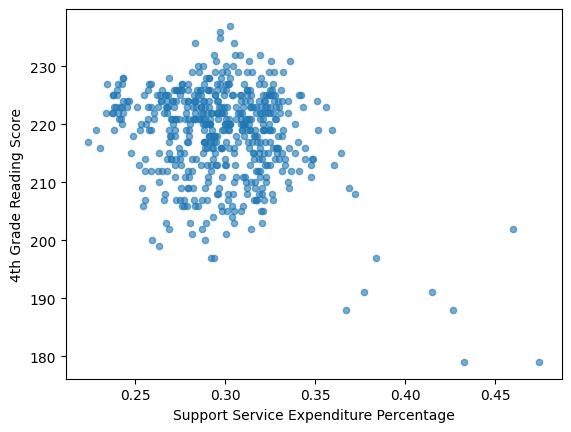

In [24]:
# @@@ 6
df.plot.scatter(x='SUPPORT_SERVICE_EXPENDITURE_PERCENTAGE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Support Service Expenditure Percentage')
plt.ylabel('4th Grade Reading Score')

**<As shown from the scattered diagram, a higher percentage spent on support service would actually lead to a decrease in 4th grade reading score. The optimal percetage for service expenditure spending is around 0.30>**

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

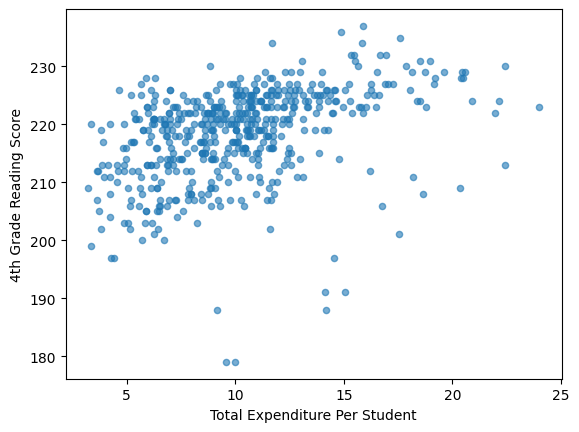

In [25]:
# @@@ 7
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Total Expenditure Per Student')
plt.ylabel('4th Grade Reading Score')

**<As shown from the scattered diagram, the higher the total expenditure per student>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
# @@@ 8

x = df[['ENROLL_4','AVG_MATH_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = df.loc[x.index]['AVG_READING_4_SCORE']

In [30]:
# @@@ 9 
y.fillna(y.median(), inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [31]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression


In [32]:
# @@@ 11
# create your model here
# model = 
model = LinearRegression()

In [35]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
y_pred = model.predict(x_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [40]:
# @@@ 12
print(model.intercept_)
print(model.coef_)



-35.368083018425665
[1.23627042e-06 4.47510038e-01 5.62263759e-01]


In [42]:
model.score(x_test, y_test)

0.870341948975265

In [43]:
np.mean(model.predict(x_test)-y_test)

np.float64(-0.23404924705263275)

In [44]:
np.mean(np.abs(model.predict(x_test)-y_test))

np.float64(2.008801181322937)

In [45]:
np.mean((model.predict(x_test)-y_test)**2)**0.5

np.float64(2.572028142553007)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [51]:
print(x_train.columns)

Index(['ENROLL_4', 'AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE'], dtype='object')


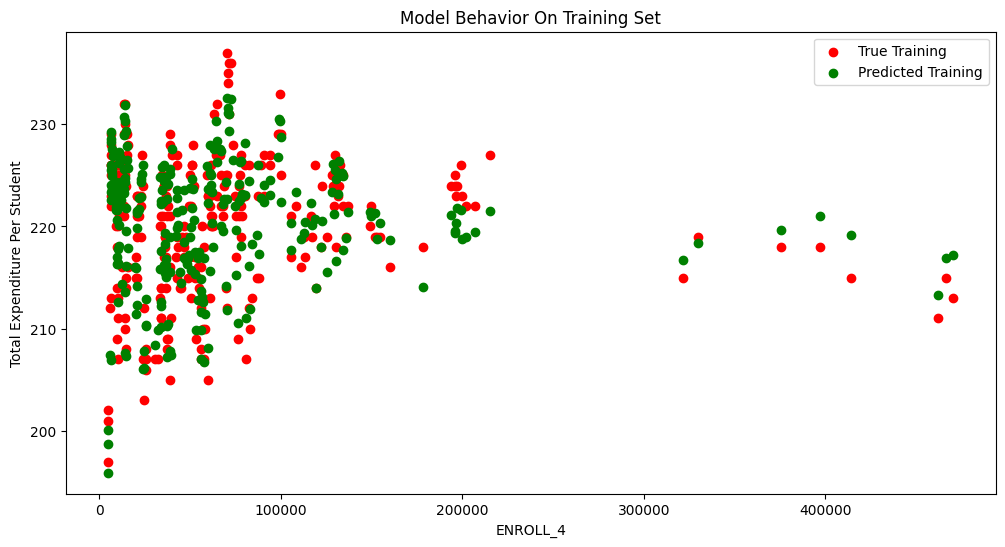

In [52]:
# @@@ 13

col_name = 'ENROLL_4'

f = plt.figure(figsize=(12,6))
plt.scatter(x_train[col_name], y_train, color = "red")
plt.scatter(x_train[col_name], model.predict(x_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Total Expenditure Per Student')
plt.title("Model Behavior On Training Set")
plt.show()

In [57]:
"When enrollment is under 100000, the total expenditure per student varies a lot. As enrollment increases, the amount of total expenditure per student gradually decreases"

'When enrollment is under 100000, the total expenditure per student varies a lot. As enrollment increases, the amount of total expenditure per student gradually decreases'

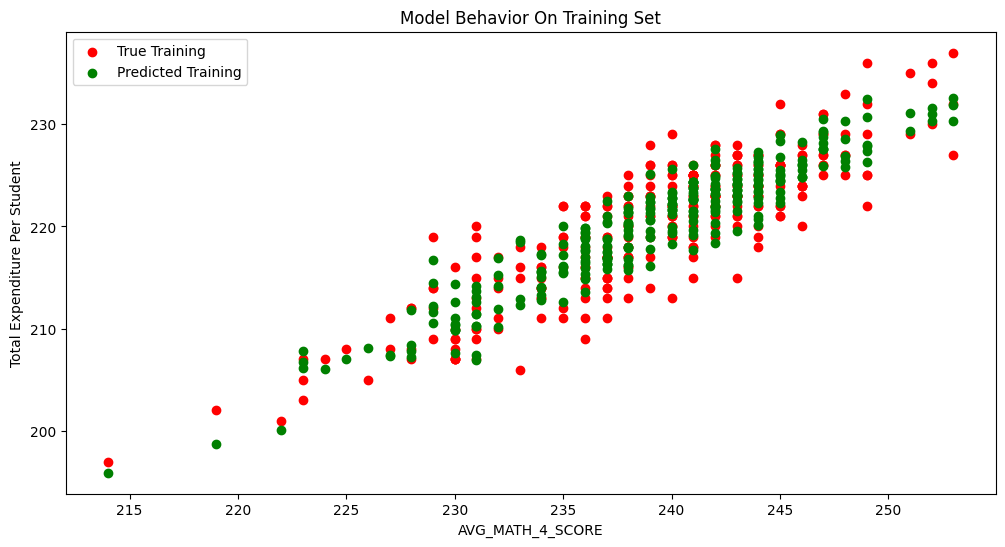

In [53]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(x_train[col_name], y_train, color = "red")
plt.scatter(x_train[col_name], model.predict(x_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Total Expenditure Per Student')
plt.title("Model Behavior On Training Set")
plt.show()

In [56]:
"The average math score for forth graders increases as total expenditure per student increases."

'The average math score for forth graders increases as total expenditure per student increases.'